In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env_hard as solitaire_env_hard
import sys
import seaborn as sns
import pickle as pkl
import gp
import tqdm.notebook as tq
sys.setrecursionlimit(10**6)

In [2]:
with open("games/run_hardgame_2020-05-25 21:06:04.113807.pkl","rb") as file:
    run_data = pkl.load(file)

In [3]:
actions_matrix = run_data['actions_matrix']

In [4]:
iterations_used_per_game = run_data['iterations_used_per_game']
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

## Maximum number of steps completed for any game

In [5]:
max_action_take = max(it.index)
max_action_take 

492

## Game that resulted into victory with smallest number of steps

In [6]:
smallest_steps = 20000
smallest_action_seq = None
smallest_gno = None
for game,actions,end_state,start_state,game_states,reason in actions_matrix:
    if reason =='won' and len(actions)<smallest_steps:
        smallest_gno = game
        smallest_steps = len(actions)
        smallest_action_seq = actions
smallest_gno,smallest_steps

(959, 61)

### Smallest Action Sequence for a Win

In [7]:
"".join([str(x) for x in smallest_action_seq])

'0011101011220111323320010011120010001101111111110111131111111'

In [8]:
action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
for x in smallest_action_seq:
    action_freq[x]+=1
    
action_freq

{0: 16, 1: 36, 2: 5, 3: 4, 4: 0, 5: 0}

## Game that resulted into victory with maximum number of steps

In [9]:
longest_steps = 0
longest_action_seq = None
longest_gno = None
longest_start_state = None
for game,actions,end_state,start_state,game_states,reason in actions_matrix:
    if reason =='won' and len(actions)>longest_steps:
        longest_gno = game
        longest_steps = len(actions)
        longest_action_seq = actions
        longest_start_state = start_state
longest_gno,longest_steps

(60, 442)

### Longest Action Sequence for a Win

In [10]:
"".join([str(x) for x in longest_action_seq])

'1111123223103313320445112244511244511323324451140233334441144511144415011424414144415111444114414451114415144144141514451545151114044411414441411144411511244141444114415451524515111444451111444511114444144511114414451114414414451111441514414414411511444115144144144141151144144411451113441444141114451144451114511441514441144411514441411451445111451444151144451545151144451114441151144144415111322111111111111231111111111111111111111111111111'

In [11]:
action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
for x in longest_action_seq:
    action_freq[x]+=1
    
action_freq

{0: 5, 1: 203, 2: 16, 3: 16, 4: 156, 5: 46}

## Replay games that were won

In [12]:
games_won_start_state = []
for game,actions,end_state,start_state,game_states,reason in actions_matrix:
    if reason =='won':
        games_won_start_state.append(start_state)
number_of_wins =  len(games_won_start_state)      
print(number_of_wins)

272


In [13]:
win_actions_matrix = [[] for _ in range(number_of_wins)]

count = 0

for i in tq.tqdm(range(number_of_wins)):
    
    game_start_state = games_won_start_state[i]
    env = solitaire_env_hard.env()
    
    env.state = game_start_state
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=win_actions_matrix,fp_flag=True)
    
    if won == True:
        count+=1
        
print(count)
        


127


### Percentage of Re-wins

In [14]:
count*100/number_of_wins

46.69117647058823

## Replay games that were Lost

In [15]:
games_lost_start_state = []
reasons = {}
for game,actions,end_state,start_state,game_states,reason in actions_matrix:
    if reason !='won':
        if reason not in reasons:
            reasons[reason] = 0
            
        reasons[reason]+=1
        games_lost_start_state.append(start_state)
number_of_losses =  len(games_lost_start_state)      
print(number_of_losses)
print(reasons)

728
{'No action could be taken': 728}


In [16]:
lost_actions_matrix = [[] for _ in range(number_of_losses)]

count = 0

for i in tq.tqdm(range(number_of_losses)):
    
    game_start_state = games_lost_start_state[i]
    env = solitaire_env_hard.env()
    
    env.state = game_start_state
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=lost_actions_matrix,fp_flag=True)
    
    if won == True:
        count+=1
        
print(count)
        


127


### Wins after Retry

In [17]:
count*100/number_of_losses

17.445054945054945

### Retry won Game with Longest sequence of actions

In [19]:
retry_output = []
number_of_retries = 20
retry_actions_matrix = [[] for _ in range(number_of_retries)]

for i in tq.tqdm(range(number_of_retries)):
    env = solitaire_env_hard.env()
    env.state = longest_start_state
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=retry_actions_matrix,fp_flag=True)
    
    retry_output.append(int(won))

In [20]:
print(sum(retry_output))

5


### Retry Lost Game with Longest sequence of actions

In [21]:
longest_steps_for_loss = 0
longest_action_seq_for_loss = None
longest_gno_for_loss = None
longest_start_state_for_loss = None
for game,actions,end_state,start_state,game_states,reason in actions_matrix:
    if reason !='won' and len(actions)>longest_steps_for_loss:
        longest_gno_for_loss = game
        longest_steps_for_loss = len(actions)
        longest_action_seq_for_loss = actions
        longest_start_state_for_loss = start_state
longest_gno_for_loss,longest_steps_for_loss

(842, 492)

In [22]:
retry_output = []
number_of_retries = 100
retry_actions_matrix = [[] for _ in range(number_of_retries)]

for i in tq.tqdm(range(number_of_retries)):
    env = solitaire_env_hard.env()
    env.state = longest_start_state_for_loss
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=retry_actions_matrix,fp_flag=True)
    
    retry_output.append(int(won))
    
print(sum(retry_output))


3


### Retry Every Game Game X number of times

In [23]:
def replay_each_game(actions_matrix = None):

    results_for_each_game = [[] for _ in range(len(actions_matrix))]

    for k  in tq.tqdm(range(len(actions_matrix))):

        game,actions,end_state,start_state,game_states,reason = actions_matrix[k]

        not_won = True

        i = 0
        game_actions_matrix = [[] for _ in range(100)]
        while not_won and i<100:

            env = solitaire_env_hard.env()
            env.state = start_state
            action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}

            _,won = gp.greedy_policy(en=env,game=i,action_freq=action_freq,actions_matrix=game_actions_matrix,fp_flag=True)

            results_for_each_game[game].append(won)
            not_won = (won == False)
            i+=1
       
    
    times_tried = [len(x) for x in results_for_each_game]
    sns.lineplot(x=range(len(times_tried)),y=times_tried)
    
    return results_for_each_game
    

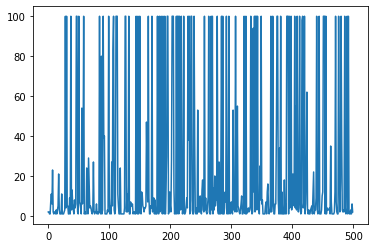

In [28]:
games_won = [x for x in times_tried if x<90]
print(len(games_won))

410


### Replay a particular game

In [22]:
class replay_game:
    
    def __init__(self,gno=0):
        
        self.temp_en = solitaire_env_hard.env()
        self.action_number = 0
        action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }
    
        for game_no,action_seq,end_state,start_state,state_seq,how_ends in actions_matrix:
            if game_no == gno:
                break;
        print("Reason game ended...   ",how_ends)
        print("Length of action sequence is.. ",len(action_seq))
        action_replay = "".join([str(x) for x in action_seq])
        
        self.action_replay = [int(x) for x in action_replay]
        
        self.temp_en.state = start_state
        self.start_state = start_state
        
        self.end_state = end_state
        
        
        self.temp_en.state = self.temp_en.copy_state()
        
        self.state_seq = state_seq
        
        self.action_seq = [action_type[int(x)] for x in action_replay]
        
        print("starting state.. \n")
        
        print("***********************************pile*****************************************")
        self.temp_en.get_pile()
        print("\n\n\n\n\n\n\n\n")
        print("*****************************foundation*****************************************")
        
        self.temp_en.get_foundation()
        print("\n\n\n\n\n\n\n\n")
        print("******************************tableau*******************************************")
        
        self.temp_en.get_tableau()
        print("\n\n\n\n\n\n\n\n")
        
    def next_state(self):
        
        print("action number..  ", self.action_number)
        
        print("action taken {} : description {} ".format(self.action_replay[self.action_number],self.action_seq[self.action_number]))
        self.action_number +=1
        self.temp_en = solitaire_env_hard.env()
        
        self.temp_en.state = self.state_seq[self.action_number]
        
        self.temp_en.state = self.temp_en.copy_state()
        
        print("starting state.. \n")
        
        print("***********************************pile*****************************************")
        self.temp_en.get_pile()
        print("\n\n\n\n\n\n\n\n")
        
        
        print("*****************************foundation*****************************************")
        
        self.temp_en.get_foundation()
        print("\n\n\n\n\n\n\n\n")
            
            
        print("******************************tableau*******************************************")
        
        self.temp_en.get_tableau()
        print("\n\n\n\n\n\n\n\n")
        
        
        
        
    def goto_state(self,n):
        self.action_number = n

In [23]:
game_replay = replay_game(gno = smallest_gno)

Reason game ended...    won
Length of action sequence is..  61
starting state.. 

***********************************pile*****************************************
position    0 suit = club       color = black      number =     9 speciality = None       face = up   
position    1 suit = spade      color = black      number =     2 speciality = None       face = up   
position    2 suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
position    3 suit = spade      color = black      number =    10 speciality = None       face = up   
position    4 suit = diamond    color = red        number =     2 speciality = None       face = up   
position    5 suit = spade      color = black      number =     3 speciality = None       face = up   
position    6 suit = heart      color = red        number =     2 speciality = None       face = up   
position    7 suit = club       color = black      number =     4 speciality = None       face = up   
position    8

In [80]:
#game_replay.goto_state(73)
game_replay.next_state()
#foundation progression

action number..   56
action taken 1 : description to_foundation_stack 
starting state.. 

***********************************pile*****************************************









*****************************foundation*****************************************
printing foundation number 1 ********************
position    0 suit = club       color = black      number =     1 speciality = ACE        face = up   
position    1 suit = club       color = black      number =     2 speciality = None       face = up   
position    2 suit = club       color = black      number =     3 speciality = None       face = up   
position    3 suit = club       color = black      number =     4 speciality = None       face = up   
position    4 suit = club       color = black      number =     5 speciality = None       face = up   
position    5 suit = club       color = black      number =     6 speciality = None       face = up   
position    6 suit = club       color = black      number =     7 speci

In [85]:
game_replay.next_state()

action number..   61


IndexError: list index out of range

In [73]:
# Tableau to foundation reveal #gamestate

In [13]:
temp_en = solitaire_env.env()

temp_en.state = game_replay.temp_en.state

In [45]:
temp_en.get_pile()

In [46]:
temp_en.get_foundation()
print("********************************************************************************************************")
temp_en.get_tableau()

printing foundation number 1 ********************
position    0 suit = club       color = black      number =     1 speciality = ACE        face = up   
position    1 suit = club       color = black      number =     2 speciality = None       face = up   
position    2 suit = club       color = black      number =     3 speciality = None       face = up   
position    3 suit = club       color = black      number =     4 speciality = None       face = up   
position    4 suit = club       color = black      number =     5 speciality = None       face = up   
position    5 suit = club       color = black      number =     6 speciality = None       face = up   
position    6 suit = club       color = black      number =     7 speciality = None       face = up   
printing foundation number 2 ********************
position    0 suit = heart      color = red        number =     1 speciality = ACE        face = up   
position    1 suit = heart      color = red        number =     2 speciality

In [43]:
w,t = temp_en.step(3,debug=True,fp_flag=True)

Debug is True


In [44]:
w,t

(False, True)

In [15]:
#foundation progression is not correct

In [15]:
#
l = [1,2,3]

In [16]:
l[:0]

[]